## Model Construction

In [2]:
import tensorflow as tf
string = tf.Variable('string', tf.string)
rank2_tensor = tf.Variable([["test",'ok'],['test','yes']], tf.string)
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [2]:
tf_1 = tf.ones([1,2,3])
tf_2 = tf.reshape(tf_1,[2,3,1])
tf_3 = tf.reshape(tf_2,[3,-1])
tf_3

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


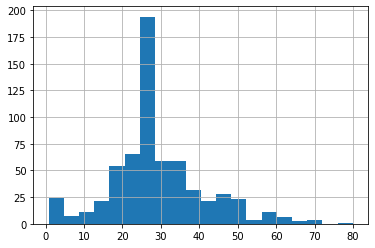

In [5]:
#dftrain.describe()
#dftrain.shape
#y_train.head()
dftrain.age.hist(bins=20)

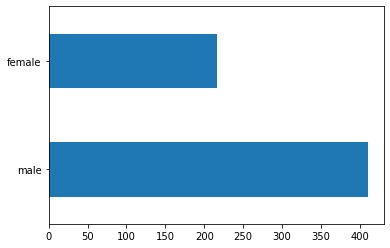

In [6]:
dftrain.sex.value_counts().plot(kind='barh')

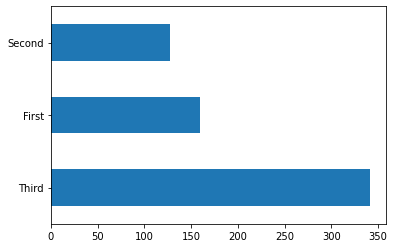

In [7]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

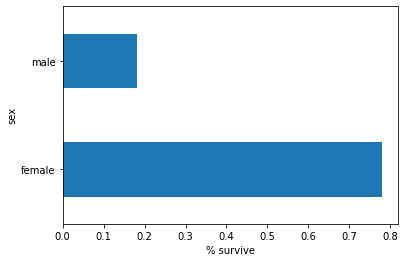

In [8]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [9]:
CATEGORICAL_COLUMNS = ['sex','n_siblings_spouses','parch','class', 'deck','embark_town', 'alone']
NUMERIC_COLUMNS = ['age','fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [10]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dftrain, y_train, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()

print(result['accuracy'])
print(result)

0.7894737
{'accuracy': 0.7894737, 'accuracy_baseline': 0.61244017, 'auc': 0.8454164, 'auc_precision_recall': 0.81978834, 'average_loss': 0.5184643, 'label/mean': 0.3875598, 'loss': 0.5144795, 'precision': 0.85350317, 'prediction/mean': 0.2616729, 'recall': 0.55144036, 'global_step': 200}


In [11]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[2])
print(result[2]['probabilities'][1])

sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
0.52142936


In [12]:
from __future__ import absolute_import,division, print_function, unicode_literals

import pandas as pd

CSV_COLUMN_NAMES = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
SPECIES = ['Setosa','Versicolor','Virginica']


In [13]:
train_path = tf.keras.utils.get_file("iris_training.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

573/573 [==============================] - 0s 0us/step


In [14]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [15]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [16]:
def input_fn(features, labels, training=True, batch_size=256):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  if training:
    dataset = dataset.shuffle(1000).repeat()
  return dataset.batch(batch_size)

In [17]:
my_feature_columns = []

for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))

print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [18]:
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    hidden_units = [30,10],
    n_classes = 3
)

classifier.train(
    input_fn = lambda:input_fn(train, train_y, training=True),
    steps=5000
)


In [19]:

eval_result = classifier.evaluate(
    input_fn = lambda:input_fn(test, test_y, training=False),
)

In [20]:
print(f'Acuraccy:{eval_result}')

Acuraccy:{'accuracy': 0.73333335, 'average_loss': 0.538459, 'loss': 0.538459, 'global_step': 5000}


## Hidden Markov Models

In [21]:
import tensorflow_probability as tfp
import tensorflow as tf
string = tf.Variable('string', tf.string)
rank2_tensor = tf.Variable([["test",'ok'],['test','yes']], tf.string)

In [22]:
tfd = tfp.distributions 
initial_distribution = tfd.Categorical(probs=[0.8,0.2])
transition_distribution = tfd.Categorical(probs = [[0.7,0.3],
                                                   [0.2,0.8]])
observation_distribution = tfd.Normal(loc=[0.,15.],scale=[5.,10.])

In [23]:
model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps = 7
)

In [24]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[3.        5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


## Redes Neurais

Cálculo dos neurônios e seus pesos:

n = sum(wi.xi) + b

Otimização

In [25]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_images[0,23,23]

194

In [28]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [29]:
class_names = ['T-shirt/top','Trouser','PullOver','Dress','Coat','Sandals','Shirt', 'Sneaker','Bag','Ankle Bot']

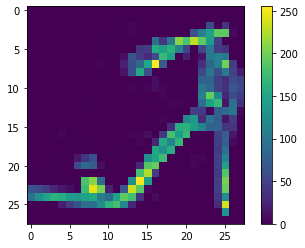

In [30]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

#### Pré-Processamento dos Dados

In [31]:
train_images = train_images/255.0

test_images = test_images/255.0

#### Construindo o modelo

In [32]:
# ARQUITETURA DA REDE NEURAL
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #camada de entrada
    keras.layers.Dense(128,activation='relu'), #camada oculta (profunda)
    keras.layers.Dense(10,activation='softmax'),#camada de saída
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
model.fit(train_images,train_labels,epochs=8);

Epoch 1/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4914 - accuracy: 0.8270
Epoch 2/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3723 - accuracy: 0.8661
Epoch 3/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3377 - accuracy: 0.8763
Epoch 4/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3116 - accuracy: 0.8844
Epoch 5/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2947 - accuracy: 0.8901
Epoch 6/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2799 - accuracy: 0.8960
Epoch 7/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2665 - accuracy: 0.9014
Epoch 8/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2556 - accuracy: 0.9053


In [34]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=1)
print('Acurácia:', round(test_acc,2))

313/313 [==============================] - 1s 2ms/step - loss: 0.3629 - accuracy: 0.8718
Acurácia: 0.87


In [35]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([1.1762666e-08, 3.1880307e-10, 6.9069729e-11, 2.7094306e-11,
       6.4863009e-10, 3.0049743e-02, 1.6579163e-08, 1.0146995e-02,
       1.6605801e-09, 9.5980310e-01], dtype=float32)

In [36]:
class_names[np.argmax(predictions[0])]

'Ankle Bot'

Sandals


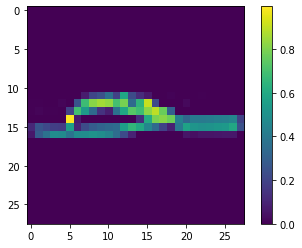

In [37]:
plt.figure()
print(class_names[np.argmax(predictions[8])])
plt.imshow(test_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

## Rede Neural Convolucional

In [41]:
from tensorflow.keras import datasets, layers, models
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

train_images,test_images = train_images/255.0, test_images/255.0

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 [==============================] - 2s 0us/step


In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [44]:
#Adicionar uma camada profunda
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))

In [46]:
# Treinamento
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images,train_labels,epochs=4,validation_data=(test_images,test_labels))

Epoch 1/4
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5476 - accuracy: 0.4319 - val_loss: 1.2704 - val_accuracy: 0.5411
Epoch 2/4
1563/1563 [==============================] - 87s 56ms/step - loss: 1.1811 - accuracy: 0.5808 - val_loss: 1.1440 - val_accuracy: 0.5999
Epoch 3/4
1563/1563 [==============================] - 94s 60ms/step - loss: 1.0435 - accuracy: 0.6314 - val_loss: 1.0171 - val_accuracy: 0.6429
Epoch 4/4
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9541 - accuracy: 0.6664 - val_loss: 0.9508 - val_accuracy: 0.6665


In [47]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print(test_acc)

313/313 - 5s - loss: 0.9508 - accuracy: 0.6665 - 5s/epoch - 15ms/step
0.6664999723434448


In [3]:
import os
keras = tf.keras

In [4]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(raw_train,raw_validation,raw_test),metadata = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
